<a href="https://colab.research.google.com/github/albs-br/tcc-machine-vision/blob/main/TCC_teste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [3]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [4]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)  

if not os.path.exists(features_dir):
    os.makedirs(features_dir)  
  
if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)  

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [74]:
# limpar diretórios de saída

for f in os.listdir(features_dir):
    if not f.endswith(".brief"):    #if os.path.isdir(f):
        continue
    os.remove(os.path.join(features_dir, f))

for f in os.listdir(cluster_dir):
    if not f.endswith(".cluster"):
        continue
    os.remove(os.path.join(cluster_dir, f))

for f in os.listdir(bow_dir):
    if not f.endswith(".bow"):
        continue
    os.remove(os.path.join(bow_dir, f))

Mostrar imagem exemplo:


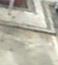

In [5]:
#Mostrar imagem:
path = '/content/drive/MyDrive/Pós IA PUC MInas/TCC/Selected Pics/UFPR04/Sunny/2012-12-07/'
frame = cv2.imread(path + 'Empty/2012-12-07_17_17_25#016.jpg')
# frame = cv2.imread(path + 'Occupied/2012-12-07_17_12_25#016.jpg')
#frame = cv2.imread('/content/20150703_0805_10.jpg')

cv2_imshow(frame)

Passo 1: calcular arquivos de vetor de features (.brief) para cada imagem

imagem: 2012-12-07_17_17_25#016.jpg


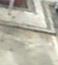

número de features (keypoints) encontradas: 39
formato (keypoints, dimensões): (39, 32)


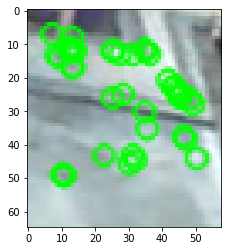

----------------------------------------
imagem: 2012-12-07_17_22_25#016.jpg


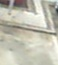

número de features (keypoints) encontradas: 47
formato (keypoints, dimensões): (47, 32)


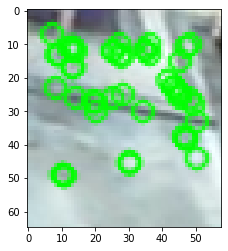

----------------------------------------
imagem: 2012-12-07_17_27_25#016.jpg


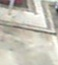

número de features (keypoints) encontradas: 38
formato (keypoints, dimensões): (38, 32)


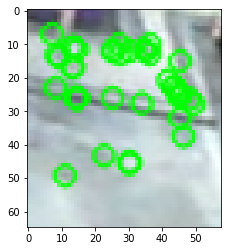

----------------------------------------
imagem: 2012-12-07_17_32_25#016.jpg


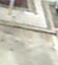

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


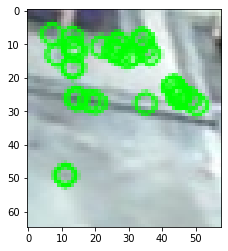

----------------------------------------
imagem: 2012-12-07_17_37_25#016.jpg


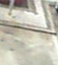

número de features (keypoints) encontradas: 54
formato (keypoints, dimensões): (54, 32)


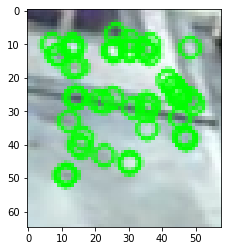

----------------------------------------
imagem: 2012-12-07_17_42_25#016.jpg


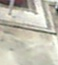

número de features (keypoints) encontradas: 54
formato (keypoints, dimensões): (54, 32)


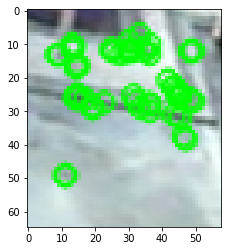

----------------------------------------
imagem: 2012-12-07_17_47_26#016.jpg


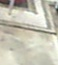

número de features (keypoints) encontradas: 42
formato (keypoints, dimensões): (42, 32)


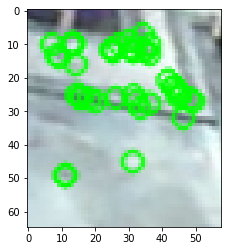

----------------------------------------
imagem: 2012-12-07_17_52_26#016.jpg


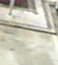

número de features (keypoints) encontradas: 60
formato (keypoints, dimensões): (60, 32)


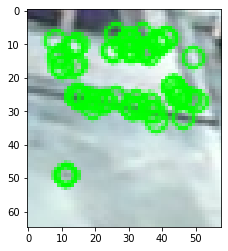

----------------------------------------
imagem: 2012-12-07_17_57_26#016.jpg


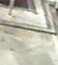

número de features (keypoints) encontradas: 67
formato (keypoints, dimensões): (67, 32)


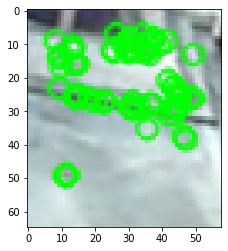

----------------------------------------
imagem: 2012-12-07_18_02_26#016.jpg


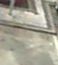

número de features (keypoints) encontradas: 67
formato (keypoints, dimensões): (67, 32)


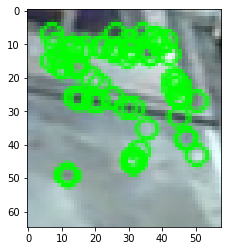

----------------------------------------
imagem: 2012-12-07_18_07_26#016.jpg


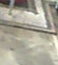

número de features (keypoints) encontradas: 64
formato (keypoints, dimensões): (64, 32)


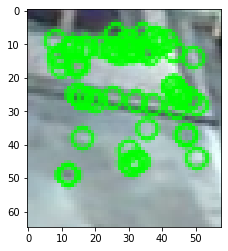

----------------------------------------
imagem: 2012-12-07_18_12_26#016.jpg


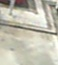

número de features (keypoints) encontradas: 68
formato (keypoints, dimensões): (68, 32)


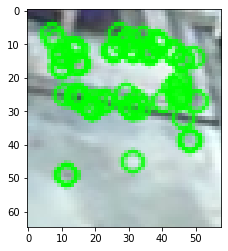

----------------------------------------
imagem: 2012-12-07_18_27_26#016.jpg


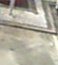

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


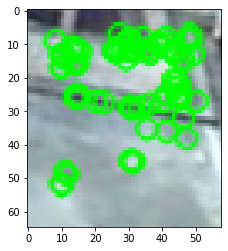

----------------------------------------
imagem: 2012-12-07_18_32_26#016.jpg


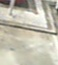

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


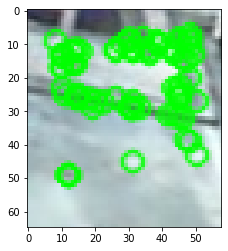

----------------------------------------
imagem: 2012-12-07_18_37_26#016.jpg


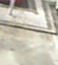

número de features (keypoints) encontradas: 73
formato (keypoints, dimensões): (73, 32)


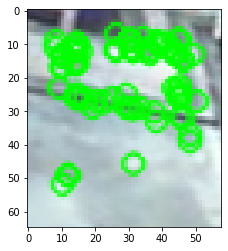

----------------------------------------
imagem: 2012-12-07_18_42_26#016.jpg


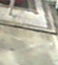

número de features (keypoints) encontradas: 77
formato (keypoints, dimensões): (77, 32)


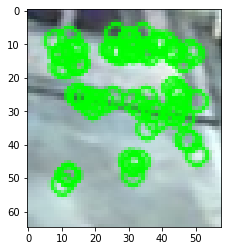

----------------------------------------
imagem: 2012-12-07_18_47_27#016.jpg


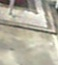

número de features (keypoints) encontradas: 70
formato (keypoints, dimensões): (70, 32)


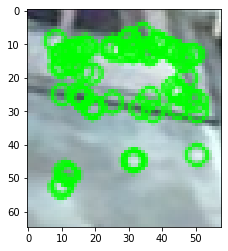

----------------------------------------
imagem: 2012-12-07_18_52_27#016.jpg


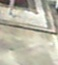

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


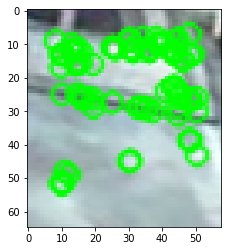

----------------------------------------
imagem: 2012-12-07_18_57_27#016.jpg


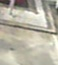

número de features (keypoints) encontradas: 66
formato (keypoints, dimensões): (66, 32)


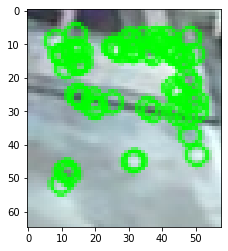

----------------------------------------
imagem: 2012-12-07_19_17_27#016.jpg


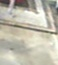

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


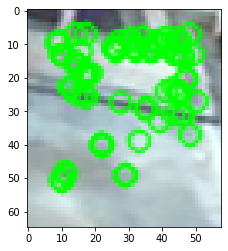

----------------------------------------
imagem: 2012-12-07_19_22_27#016.jpg


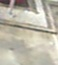

número de features (keypoints) encontradas: 68
formato (keypoints, dimensões): (68, 32)


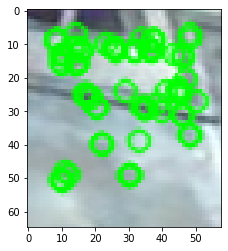

----------------------------------------
imagem: 2012-12-07_19_27_27#016.jpg


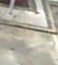

número de features (keypoints) encontradas: 67
formato (keypoints, dimensões): (67, 32)


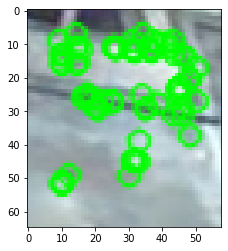

----------------------------------------
imagem: 2012-12-07_19_32_27#016.jpg


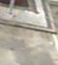

número de features (keypoints) encontradas: 51
formato (keypoints, dimensões): (51, 32)


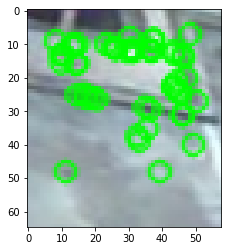

----------------------------------------
imagem: 2012-12-07_19_37_28#016.jpg


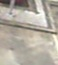

número de features (keypoints) encontradas: 48
formato (keypoints, dimensões): (48, 32)


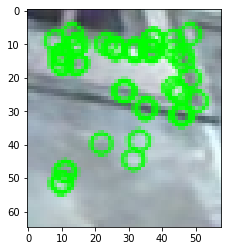

----------------------------------------
imagem: 2012-12-07_19_42_28#016.jpg


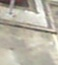

número de features (keypoints) encontradas: 53
formato (keypoints, dimensões): (53, 32)


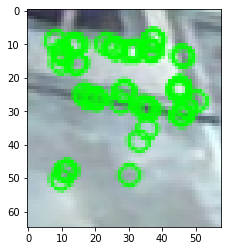

----------------------------------------
imagem: 2012-12-07_19_47_28#016.jpg


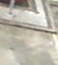

número de features (keypoints) encontradas: 56
formato (keypoints, dimensões): (56, 32)


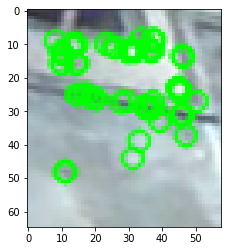

----------------------------------------
imagem: 2012-12-07_19_52_28#016.jpg


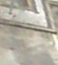

número de features (keypoints) encontradas: 47
formato (keypoints, dimensões): (47, 32)


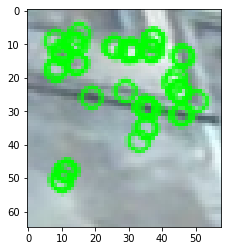

----------------------------------------
imagem: 2012-12-07_19_57_28#016.jpg


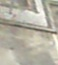

número de features (keypoints) encontradas: 50
formato (keypoints, dimensões): (50, 32)


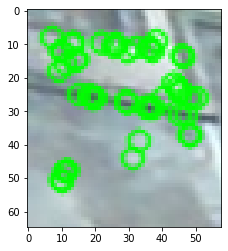

----------------------------------------
imagem: 2012-12-07_20_02_28#016.jpg


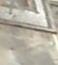

número de features (keypoints) encontradas: 53
formato (keypoints, dimensões): (53, 32)


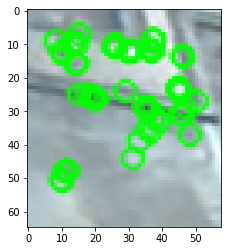

----------------------------------------
imagem: 2012-12-07_20_07_28#016.jpg


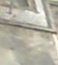

número de features (keypoints) encontradas: 46
formato (keypoints, dimensões): (46, 32)


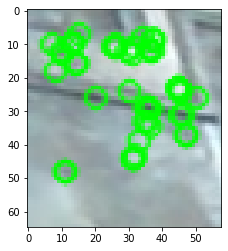

----------------------------------------
imagem: 2012-12-07_20_12_28#016.jpg


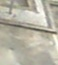

número de features (keypoints) encontradas: 46
formato (keypoints, dimensões): (46, 32)


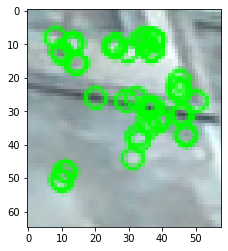

----------------------------------------
imagem: 2012-12-07_20_17_28#016.jpg


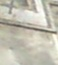

número de features (keypoints) encontradas: 40
formato (keypoints, dimensões): (40, 32)


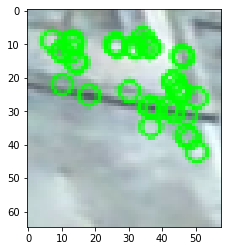

----------------------------------------
imagem: 2012-12-07_20_22_28#016.jpg


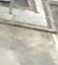

número de features (keypoints) encontradas: 49
formato (keypoints, dimensões): (49, 32)


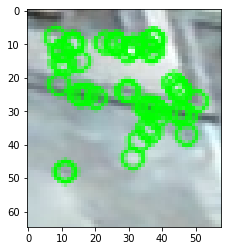

----------------------------------------
imagem: 2012-12-07_20_27_28#016.jpg


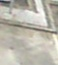

número de features (keypoints) encontradas: 42
formato (keypoints, dimensões): (42, 32)


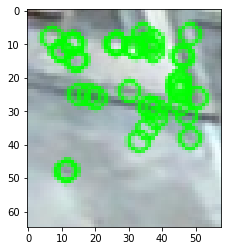

----------------------------------------
imagem: 2012-12-07_20_32_28#016.jpg


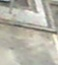

número de features (keypoints) encontradas: 40
formato (keypoints, dimensões): (40, 32)


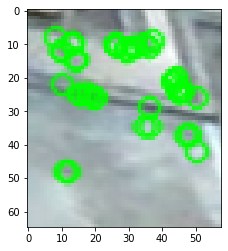

----------------------------------------
imagem: 2012-12-07_20_37_29#016.jpg


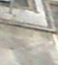

número de features (keypoints) encontradas: 44
formato (keypoints, dimensões): (44, 32)


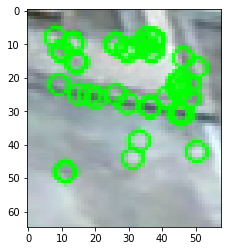

----------------------------------------
imagem: 2012-12-07_20_42_29#016.jpg


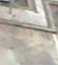

número de features (keypoints) encontradas: 50
formato (keypoints, dimensões): (50, 32)


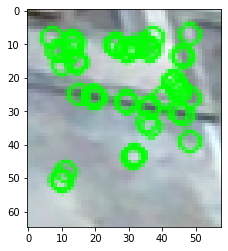

----------------------------------------
imagem: occupied 2012-12-07_19_12_27#016.jpg


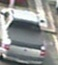

número de features (keypoints) encontradas: 132
formato (keypoints, dimensões): (132, 32)


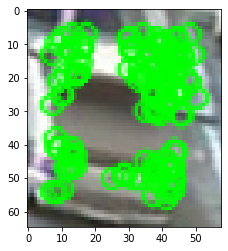

----------------------------------------
imagem: occupied 2012-12-07_18_22_26#016.jpg


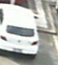

número de features (keypoints) encontradas: 101
formato (keypoints, dimensões): (101, 32)


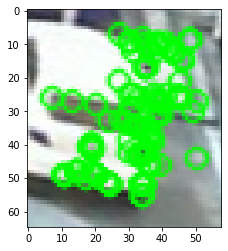

----------------------------------------
imagem: occupied 2012-12-07_17_12_25#016.jpg


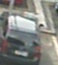

número de features (keypoints) encontradas: 136
formato (keypoints, dimensões): (136, 32)


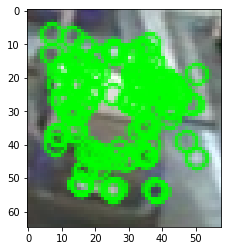

----------------------------------------
imagem: occupied 2012-12-07_19_07_27#016.jpg


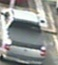

número de features (keypoints) encontradas: 143
formato (keypoints, dimensões): (143, 32)


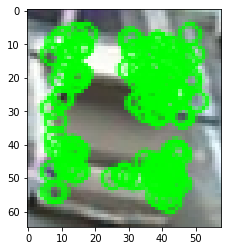

----------------------------------------
imagem: occupied 2012-12-07_19_02_27#016.jpg


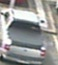

número de features (keypoints) encontradas: 142
formato (keypoints, dimensões): (142, 32)


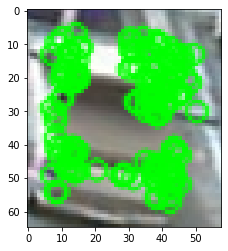

----------------------------------------
imagem: occupied 2012-12-07_18_17_26#016.jpg


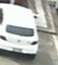

número de features (keypoints) encontradas: 106
formato (keypoints, dimensões): (106, 32)


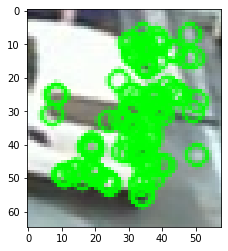

----------------------------------------
CPU times: user 6.55 s, sys: 194 ms, total: 6.74 s
Wall time: 7 s


In [75]:
%%time
frames_dir = path + 'All'
#frames_dir = path + 'Empty'
#frames_dir = path + 'Occupied'
#frames_dir = '/content/'

#print(os.path.exists(frames_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print("imagem: " + file)
    
        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # mostrar imagem original
        cv2_imshow(img)

        # opcional: redimensiona a imagem
        #img = cv2.resize(
        # img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        
        
        # Initiate STAR detector
        #star = cv2.xfeatures2d.StarDetector_create()

        # Initiate ORB detector
        # valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
        orb = cv2.ORB_create(
          nfeatures = 500,                    # The maximum number of features to retain.
          scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
          nlevels = 8,                        # The number of pyramid levels.
          edgeThreshold = 7,                  # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
          firstLevel = 0,                     # It should be 0 in the current implementation.
          WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
          scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                              # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                              # keypoints, but it is a little faster to compute.
          #scoreType = cv2.ORB_FAST_SCORE,
          patchSize = 7                       # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
                                              # by a feature will be larger.
        )



        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()



        # find the keypoints with STAR
        #kp = star.detect(img, None)

        # find the keypoints with ORB
        kp = orb.detect(img, None)



        # compute the descriptors with BRIEF
        #kp, feat = brief.compute(img, kp)        

        # compute the descriptors with ORB
        kp, feat = orb.compute(img, kp)


        # imprimir numero de features encontradas
        print("número de features (keypoints) encontradas: " + str(len(kp)))
        print("formato (keypoints, dimensões): " + str(np.shape(feat)))
        #print(feat)


        # mostrar imagem com os keypoints encontrados
        img2_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0), \
                flags=cv2.DrawMatchesFlags_DEFAULT)
        plt.figure()
        plt.imshow(img2_kp)
        plt.show()


        feat_path = join(features_dir, file)
        #feat_path = join(frames_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:            
            pickle.dump(feat.tolist(), f)        

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

        print("----------------------------------------")

Criação do vocabulário visual

1. Clusterização

In [76]:
from sklearn.cluster import KMeans
import time

In [77]:
cluster_file = cluster_dir + "cluster.cluster"

In [78]:
# número de clusters
k = 64

# números de dimensões das features
dim = 32

In [79]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [80]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

(2835, 32)
1.4040007591247559


2. Bag of Visual Word

In [81]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
CPU times: user 2.35 s, sys: 10.8 ms, total: 2.36 s
Wall time: 2.38 s


**Busca**

Utilizando um arquivo de BoW de uma das imagens de entrada

In [87]:
%%time
# leitura das imagens do diretório

# img_busca = "/occupied 2012-12-07_17_12_25#016.jpg.brief.bow" # mais semelhante: 18.1 (Occupied)
# img_busca = "/occupied 2012-12-07_18_22_26#016.jpg.brief.bow" # mais semelhante: 10.3 (Occupied)
# img_busca = "/2012-12-07_20_22_28#016.jpg.brief.bow" # mais semelhante: 8.0 (empty)
img_busca = "/2012-12-07_18_02_26#016.jpg.brief.bow" # mais semelhante: 8.9 (empty)

q = np.loadtxt(bow_dir + img_busca)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

2012-12-07_17_32_25#016.jpg.brief.bow: 12.083045973594572
2012-12-07_19_52_28#016.jpg.brief.bow: 12.083045973594572
2012-12-07_20_37_29#016.jpg.brief.bow: 11.090536506409418
2012-12-07_20_27_28#016.jpg.brief.bow: 10.535653752852738
2012-12-07_20_12_28#016.jpg.brief.bow: 10.816653826391969
2012-12-07_17_52_26#016.jpg.brief.bow: 11.0
2012-12-07_20_17_28#016.jpg.brief.bow: 11.180339887498949
2012-12-07_20_22_28#016.jpg.brief.bow: 13.564659966250536
occupied 2012-12-07_17_12_25#016.jpg.brief.bow: 21.095023109728988
2012-12-07_18_37_26#016.jpg.brief.bow: 10.954451150103322
2012-12-07_18_12_26#016.jpg.brief.bow: 11.090536506409418
2012-12-07_18_57_27#016.jpg.brief.bow: 12.922847983320086
2012-12-07_19_42_28#016.jpg.brief.bow: 12.0
2012-12-07_17_22_25#016.jpg.brief.bow: 10.295630140987
2012-12-07_19_37_28#016.jpg.brief.bow: 11.0
2012-12-07_17_57_26#016.jpg.brief.bow: 10.0
2012-12-07_17_37_25#016.jpg.brief.bow: 10.44030650891055
2012-12-07_17_17_25#016.jpg.brief.bow: 10.488088481701515
2012-12